# Krish Bansal 23115069


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [104]:
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [106]:
X_train

array([[6.9, 3.1, 5.4, 2.1],
       [5.2, 2.7, 3.9, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [4.6, 3.4, 1.4, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [5.9, 3. , 5.1, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.8, 1.5, 0.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.1, 3. , 4.9, 1.8],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [4.9, 2.5, 4.5, 1.7],
       [5.8, 2.8, 5.1, 2.4],
       [5.6, 2.8, 4.9, 2. ],
       [5. , 3.2, 1.2, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [4.8, 3. , 1.4, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 2.4, 3.3, 1. ],
       [7.3, 2.9, 6.3, 1.8],
       [7.6, 3. , 6.6, 2.1],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 2.2, 4. , 1. ],
       [5.7, 2

In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC()
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1-Score': f1_score(y_test, y_pred, average='weighted'),
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred, target_names=target_names)
        }

    return results

In [109]:
results_original = train_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

In [110]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
results_pca = train_evaluate_models(X_train_pca, X_test_pca, y_train, y_test)

In [111]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
results_lda = train_evaluate_models(X_train_lda, X_test_lda, y_train, y_test)

In [112]:
def create_comparison_dataframe(metric_name):
    data = {
        'Original': [results_original[model][metric_name] for model in results_original],
        'PCA': [results_pca[model][metric_name] for model in results_pca],
        'LDA': [results_lda[model][metric_name] for model in results_lda]
    }
    return pd.DataFrame(data, index=list(results_original.keys()))

In [113]:
accuracy_df = create_comparison_dataframe('Accuracy')
precision_df = create_comparison_dataframe('Precision')
recall_df = create_comparison_dataframe('Recall')
f1_df = create_comparison_dataframe('F1-Score')

In [114]:
print("ACCURACY COMPARISON")
print()
print(accuracy_df)

print("\nPRECISION COMPARISON")
print()
print(precision_df)

print("\nRECALL COMPARISON")
print()
print(recall_df)

print("\nF1-SCORE COMPARISON")
print()
print(f1_df)

ACCURACY COMPARISON

                     Original       PCA       LDA
Logistic Regression      0.95  0.950000  0.966667
Decision Tree            0.95  0.866667  0.966667
Random Forest            0.95  0.900000  0.966667
SVM                      0.95  0.916667  0.966667

PRECISION COMPARISON

                     Original       PCA       LDA
Logistic Regression  0.950877  0.950877  0.966667
Decision Tree        0.950877  0.867992  0.966667
Random Forest        0.950877  0.900000  0.966667
SVM                  0.950877  0.917087  0.966667

RECALL COMPARISON

                     Original       PCA       LDA
Logistic Regression      0.95  0.950000  0.966667
Decision Tree            0.95  0.866667  0.966667
Random Forest            0.95  0.900000  0.966667
SVM                      0.95  0.916667  0.966667

F1-SCORE COMPARISON

                     Original       PCA       LDA
Logistic Regression  0.950035  0.950035  0.966667
Decision Tree        0.950035  0.865920  0.966667
Random Forest 

In [115]:
print("\nCONFUSION MATRICES")
print()

for method_name, results in [("Original", results_original),
                             ("PCA", results_pca),
                             ("LDA", results_lda)]:
    print(f"\n{method_name} Method:")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        cm = metrics['Confusion Matrix']
        print(cm)


CONFUSION MATRICES


Original Method:

Logistic Regression:
[[22  0  0]
 [ 0 17  1]
 [ 0  2 18]]

Decision Tree:
[[22  0  0]
 [ 0 17  1]
 [ 0  2 18]]

Random Forest:
[[22  0  0]
 [ 0 17  1]
 [ 0  2 18]]

SVM:
[[22  0  0]
 [ 0 17  1]
 [ 0  2 18]]

PCA Method:

Logistic Regression:
[[22  0  0]
 [ 0 17  1]
 [ 0  2 18]]

Decision Tree:
[[22  0  0]
 [ 0 13  5]
 [ 0  3 17]]

Random Forest:
[[22  0  0]
 [ 0 15  3]
 [ 0  3 17]]

SVM:
[[22  0  0]
 [ 0 15  3]
 [ 0  2 18]]

LDA Method:

Logistic Regression:
[[22  0  0]
 [ 0 17  1]
 [ 0  1 19]]

Decision Tree:
[[22  0  0]
 [ 0 17  1]
 [ 0  1 19]]

Random Forest:
[[22  0  0]
 [ 0 17  1]
 [ 0  1 19]]

SVM:
[[22  0  0]
 [ 0 17  1]
 [ 0  1 19]]


In [116]:
def plot_confusion_matrices(results, method_name):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    for i, (model_name, metrics) in enumerate(results.items()):
        cm = metrics['Confusion Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{method_name} - {model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')
        axes[i].set_xticklabels(target_names)
        axes[i].set_yticklabels(target_names)

    plt.tight_layout()
    return fig

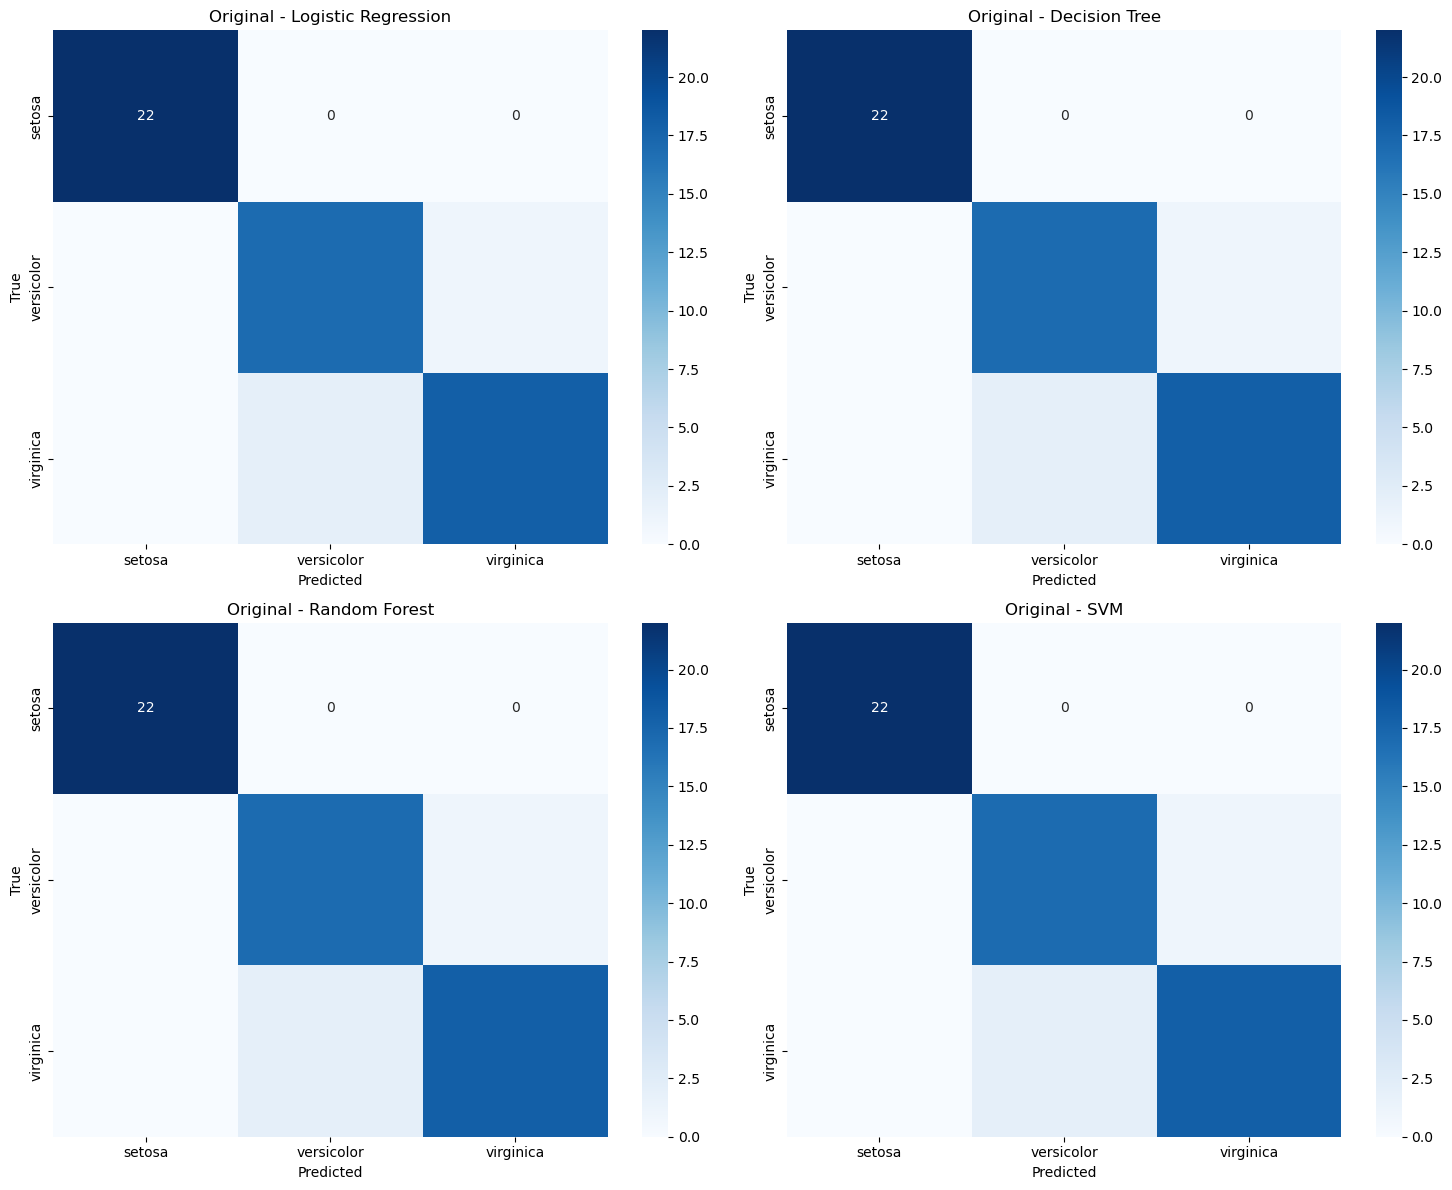

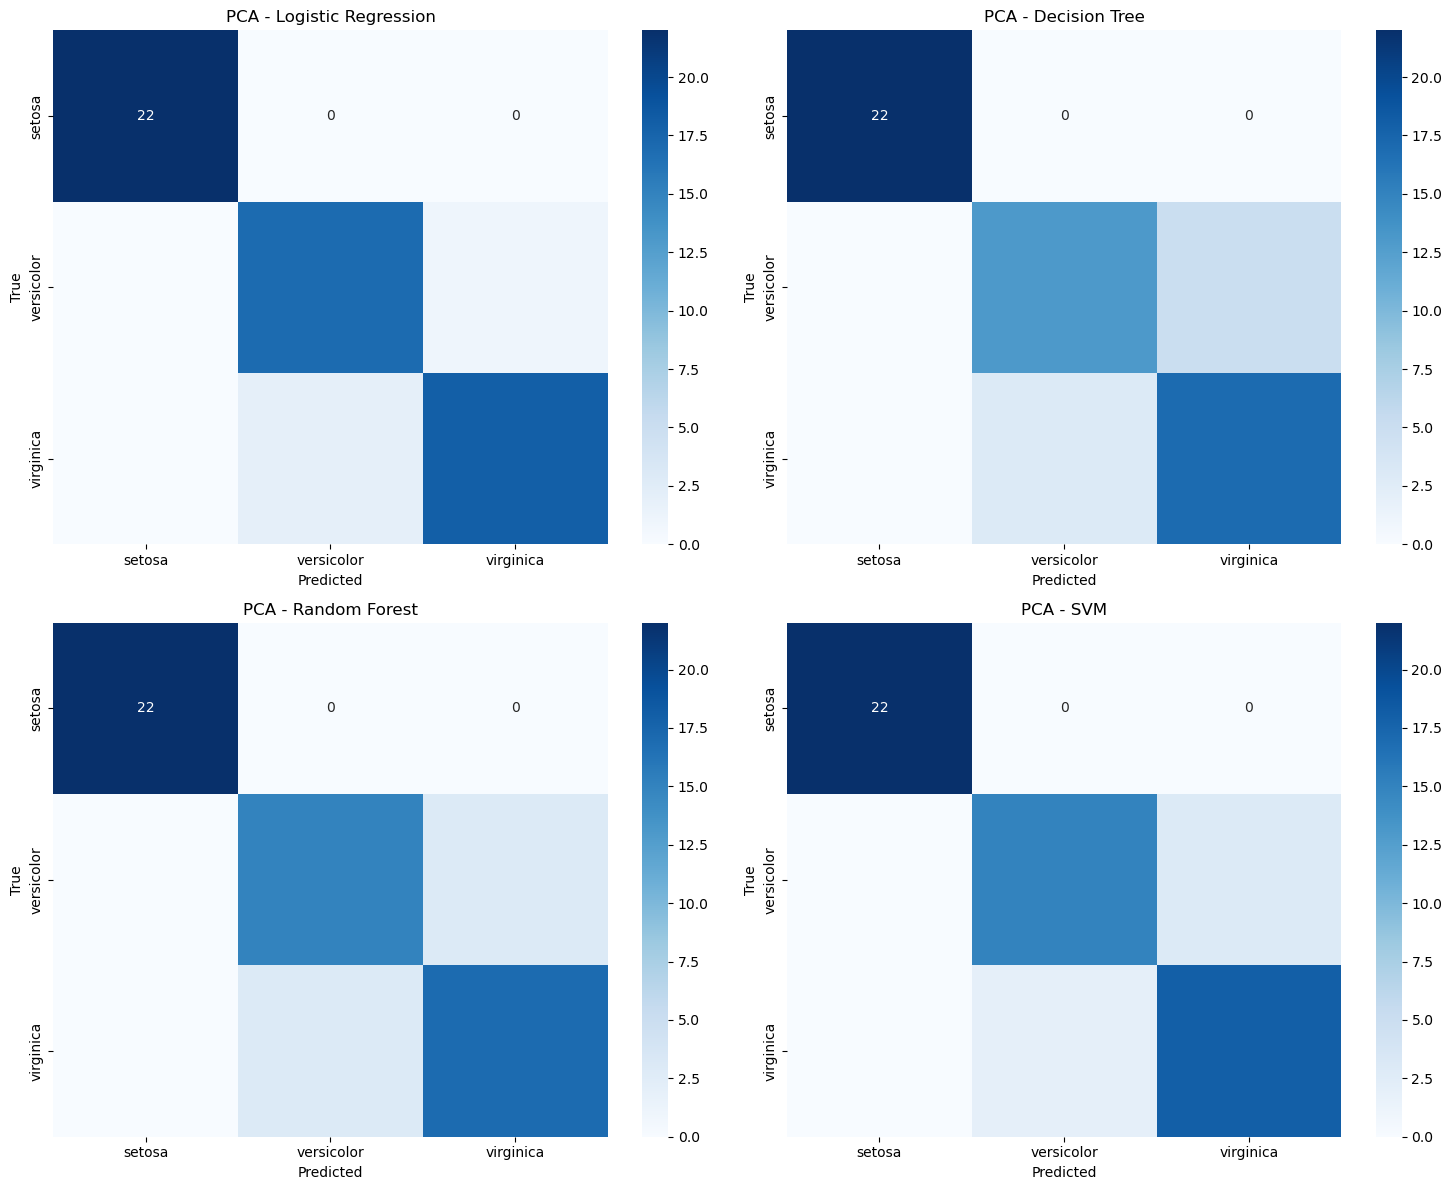

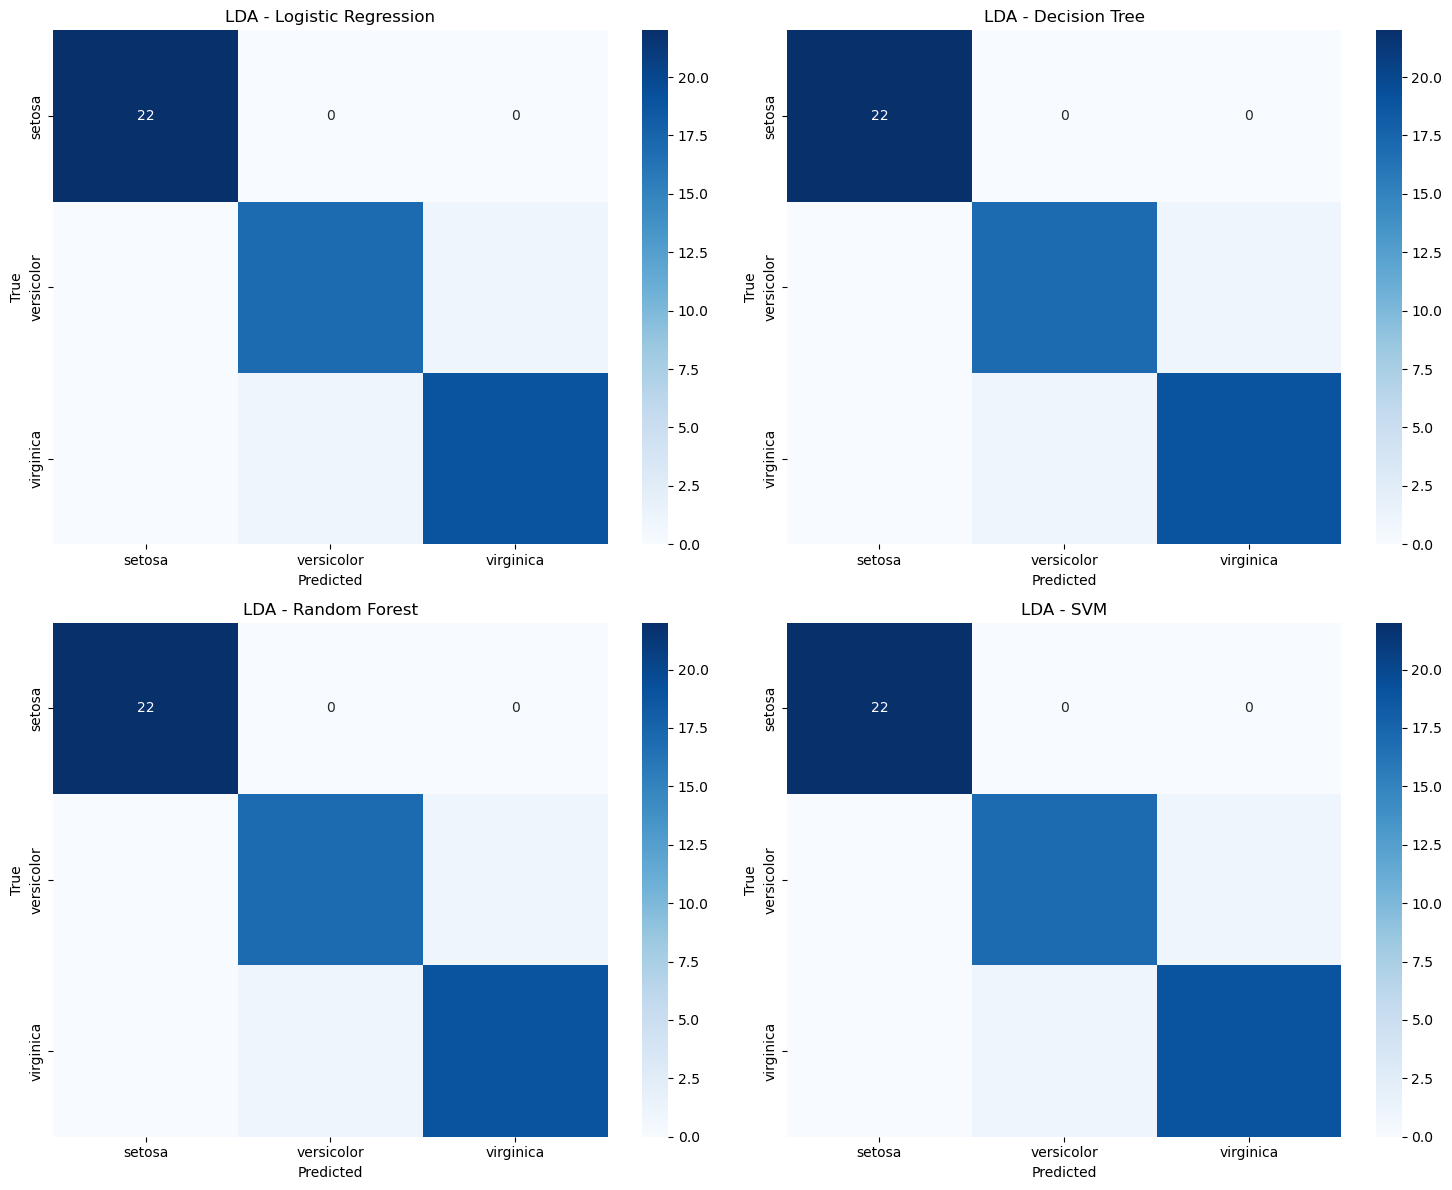

In [117]:
plot_confusion_matrices(results_original, 'Original')
plt.show()

plot_confusion_matrices(results_pca, 'PCA')
plt.show()

plot_confusion_matrices(results_lda, 'LDA')
plt.show()

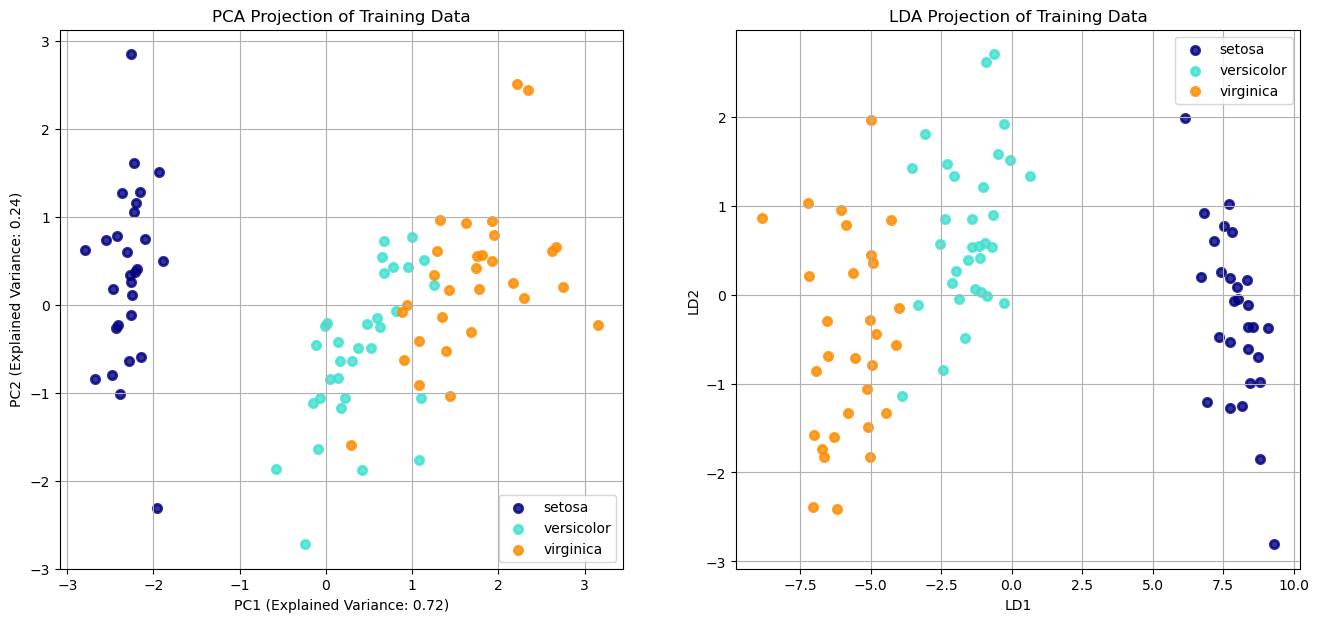

In [118]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

colors = ['navy', 'turquoise', 'darkorange']

for i, color in enumerate(colors):
    ax1.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                color=color, alpha=0.8, lw=2, label=target_names[i])
ax1.set_title('PCA Projection of Training Data')
ax1.set_xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
ax1.set_ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
ax1.legend()
ax1.grid(True)

for i, color in enumerate(colors):
    ax2.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1],
                color=color, alpha=0.8, lw=2, label=target_names[i])
ax2.set_title('LDA Projection of Training Data')
ax2.set_xlabel('LD1')
ax2.set_ylabel('LD2')
ax2.legend()
ax2.grid(True)

   

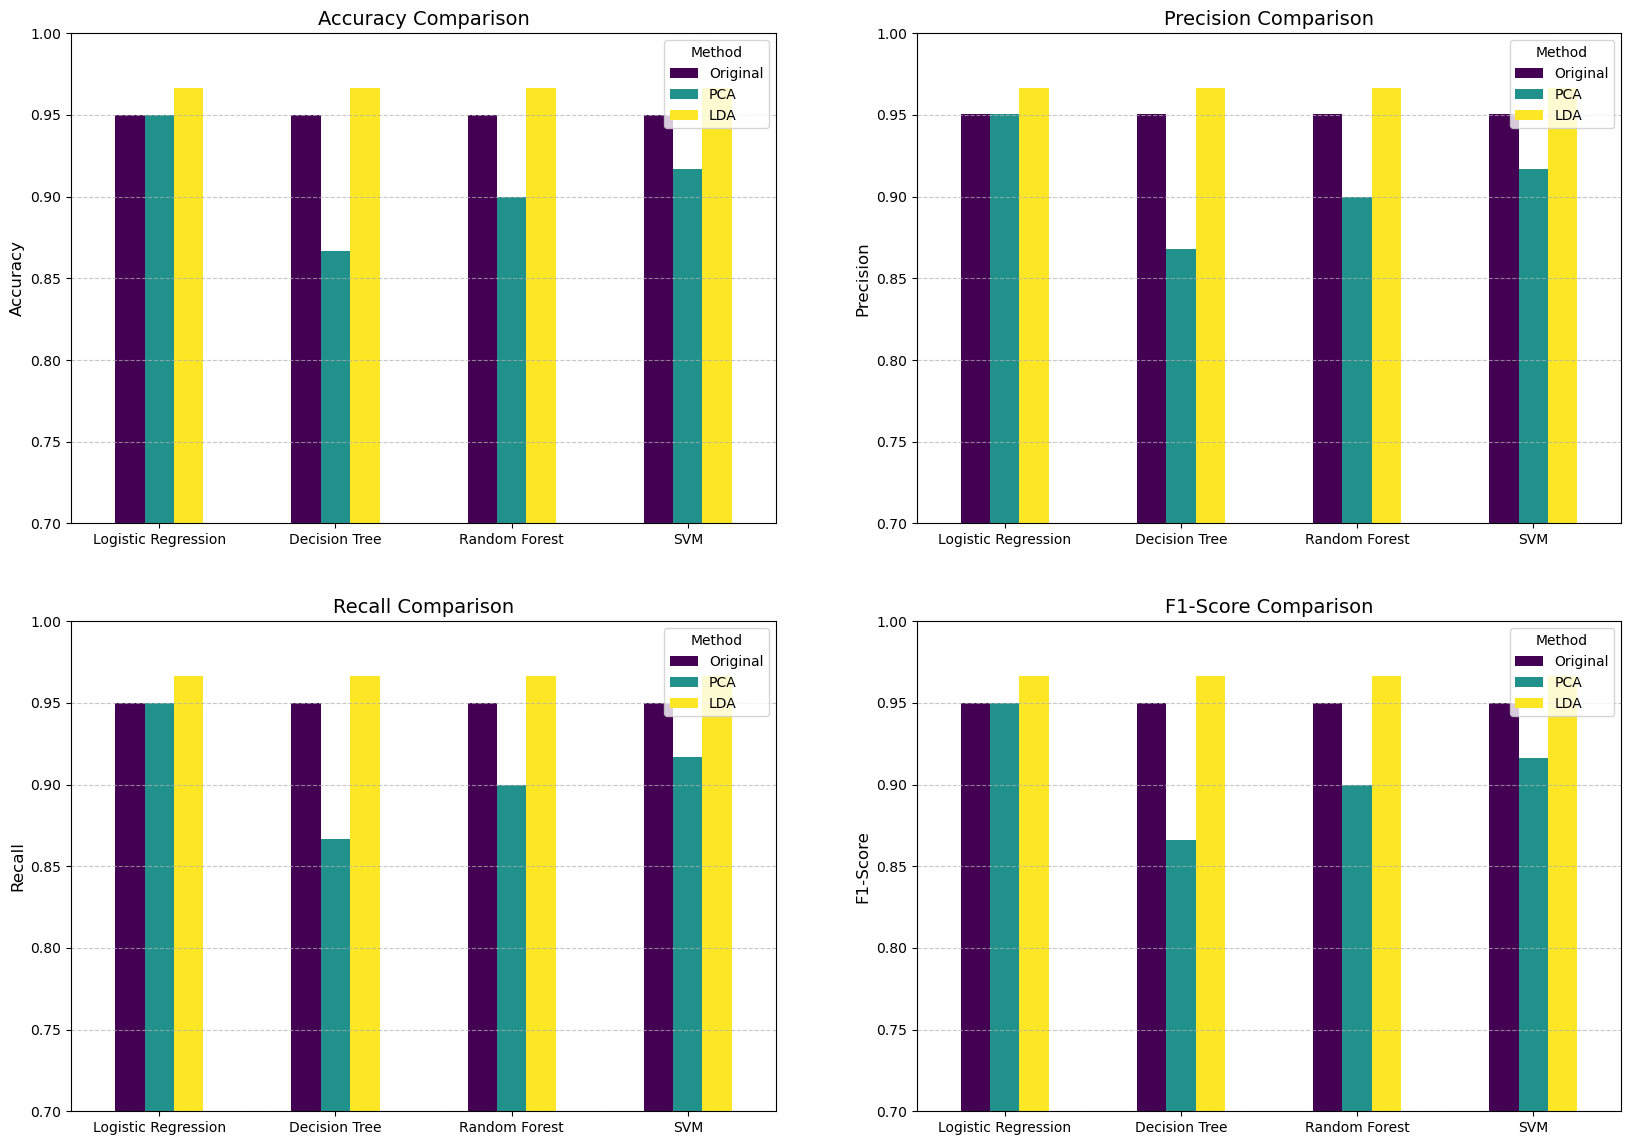

In [119]:

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

metrics = {
    'Accuracy': accuracy_df,
    'Precision': precision_df,
    'Recall': recall_df,
    'F1-Score': f1_df
}

for i, (metric_name, df) in enumerate(metrics.items()):
    df.plot(kind='bar', ax=axes[i], rot=0, colormap='viridis')
    axes[i].set_title(f'{metric_name} Comparison', fontsize=14)
    axes[i].set_ylabel(metric_name, fontsize=12)
    axes[i].set_ylim([0.7, 1.0])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(title='Method')


In [120]:
all_results = []
for model_name in results_original.keys():
    for method, results in [('Original', results_original), ('PCA', results_pca), ('LDA', results_lda)]:
        all_results.append({
            'Model': model_name,
            'Method': method,
            'Accuracy': results[model_name]['Accuracy'],
            'Precision': results[model_name]['Precision'],
            'Recall': results[model_name]['Recall'],
            'F1-Score': results[model_name]['F1-Score']
        })

summary_df = pd.DataFrame(all_results)

In [121]:
print("\nCOMPLETE SUMMARY OF RESULTS")
print()
print(summary_df)


COMPLETE SUMMARY OF RESULTS

                  Model    Method  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  Original  0.950000   0.950877  0.950000  0.950035
1   Logistic Regression       PCA  0.950000   0.950877  0.950000  0.950035
2   Logistic Regression       LDA  0.966667   0.966667  0.966667  0.966667
3         Decision Tree  Original  0.950000   0.950877  0.950000  0.950035
4         Decision Tree       PCA  0.866667   0.867992  0.866667  0.865920
5         Decision Tree       LDA  0.966667   0.966667  0.966667  0.966667
6         Random Forest  Original  0.950000   0.950877  0.950000  0.950035
7         Random Forest       PCA  0.900000   0.900000  0.900000  0.900000
8         Random Forest       LDA  0.966667   0.966667  0.966667  0.966667
9                   SVM  Original  0.950000   0.950877  0.950000  0.950035
10                  SVM       PCA  0.916667   0.917087  0.916667  0.916492
11                  SVM       LDA  0.966667   0.966667  0.966667  0.96

In [122]:
avg_by_method = summary_df.groupby('Method')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean()
print("\nAVERAGE PERFORMANCE BY METHOD")
print()
print(avg_by_method)

avg_by_model = summary_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean()
print("\nAVERAGE PERFORMANCE BY MODEL")
print()
print(avg_by_model)


AVERAGE PERFORMANCE BY METHOD

          Accuracy  Precision    Recall  F1-Score
Method                                           
LDA       0.966667   0.966667  0.966667  0.966667
Original  0.950000   0.950877  0.950000  0.950035
PCA       0.908333   0.908989  0.908333  0.908112

AVERAGE PERFORMANCE BY MODEL

                     Accuracy  Precision    Recall  F1-Score
Model                                                       
Decision Tree        0.927778   0.928512  0.927778  0.927540
Logistic Regression  0.955556   0.956140  0.955556  0.955579
Random Forest        0.938889   0.939181  0.938889  0.938900
SVM                  0.944444   0.944877  0.944444  0.944398


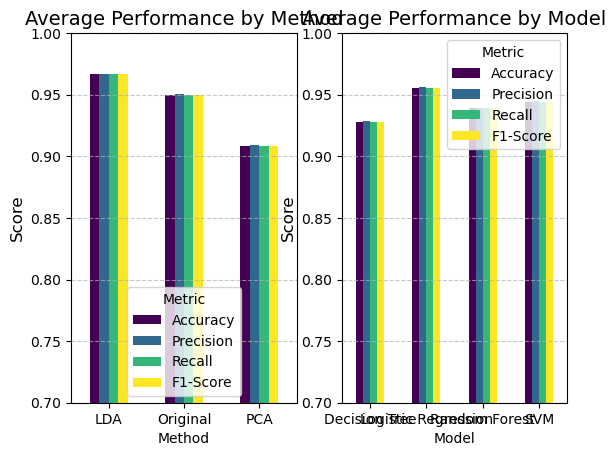

In [123]:

fig, (ax1, ax2) = plt.subplots(1, 2)

avg_by_method.plot(kind='bar', ax=ax1, rot=0, colormap='viridis')
ax1.set_title('Average Performance by Method', fontsize=14)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_ylim([0.7, 1.0])
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title='Metric')


avg_by_model.plot(kind='bar', ax=ax2, rot=0, colormap='viridis')
ax2.set_title('Average Performance by Model', fontsize=14)
ax2.set_ylabel('Score', fontsize=12 )
ax2.set_ylim([0.7, 1.0])
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title='Metric')
plt.show()

    

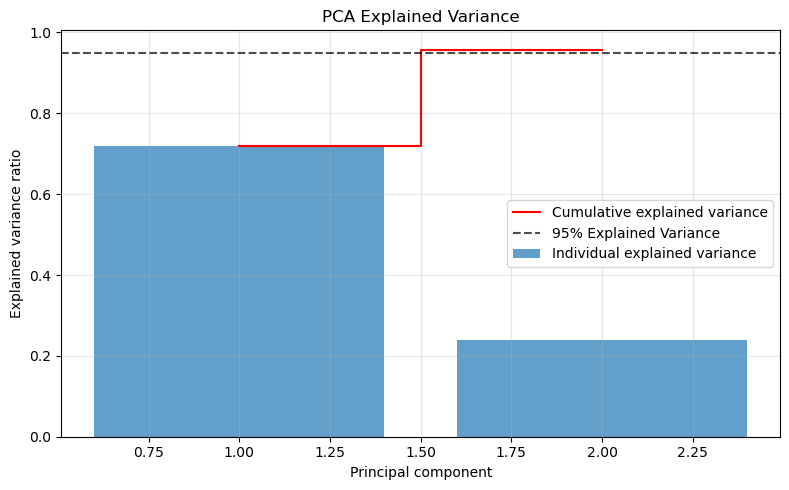

In [124]:

plt.figure(figsize=(8, 5))

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7,
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
        label='Cumulative explained variance', color='red')

plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.7, label='95% Explained Variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

In [125]:
print("PCA varience")

print(f"1st Component : {pca.explained_variance_ratio_[0]}")
print(f"2nd Component : {pca.explained_variance_ratio_[1]}")
print(f"Total : {sum(pca.explained_variance_ratio_[:2])}")

PCA varience
1st Component : 0.7190493975191988
2nd Component : 0.23826822005185036
Total : 0.9573176175710492


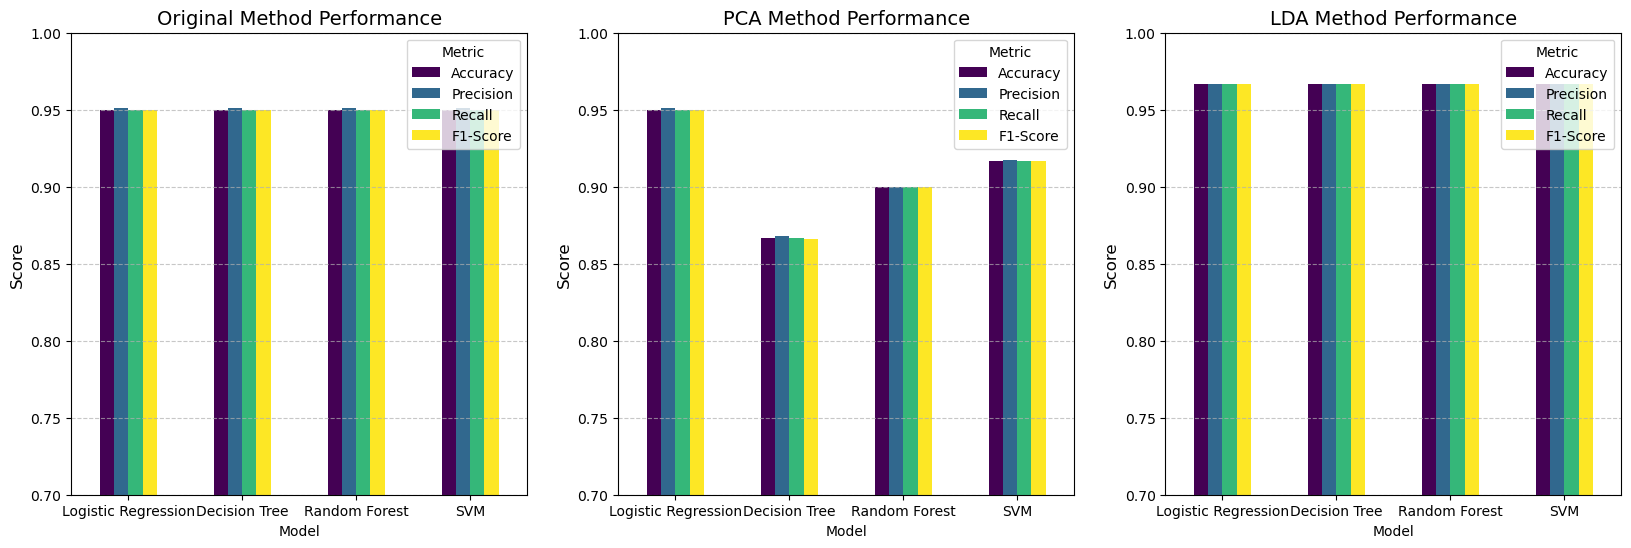

In [126]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

methods = ['Original', 'PCA', 'LDA']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, method in enumerate(methods):
    method_data = summary_df[summary_df['Method'] == method]

    # Create a dataframe suitable for plotting without pivot
    plot_data = method_data.set_index('Model')[metrics]

    plot_data.plot(kind='bar', ax=axes[i], rot=0, colormap='viridis')
    axes[i].set_title(f'{method} Method Performance', fontsize=14)
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].set_ylim([0.7, 1.0])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(title='Metric')

    
    

In [127]:
best_models = summary_df.loc[summary_df.groupby('Method')['Accuracy'].idxmax()]

print("Best Model For Each Method (Based on Accuracy)")
print(best_models[['Method', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']])

Best Model For Each Method (Based on Accuracy)
     Method                Model  Accuracy  Precision    Recall  F1-Score
2       LDA  Logistic Regression  0.966667   0.966667  0.966667  0.966667
0  Original  Logistic Regression  0.950000   0.950877  0.950000  0.950035
1       PCA  Logistic Regression  0.950000   0.950877  0.950000  0.950035


Text(0.5, 1.0, 'Method Performance Comparison')

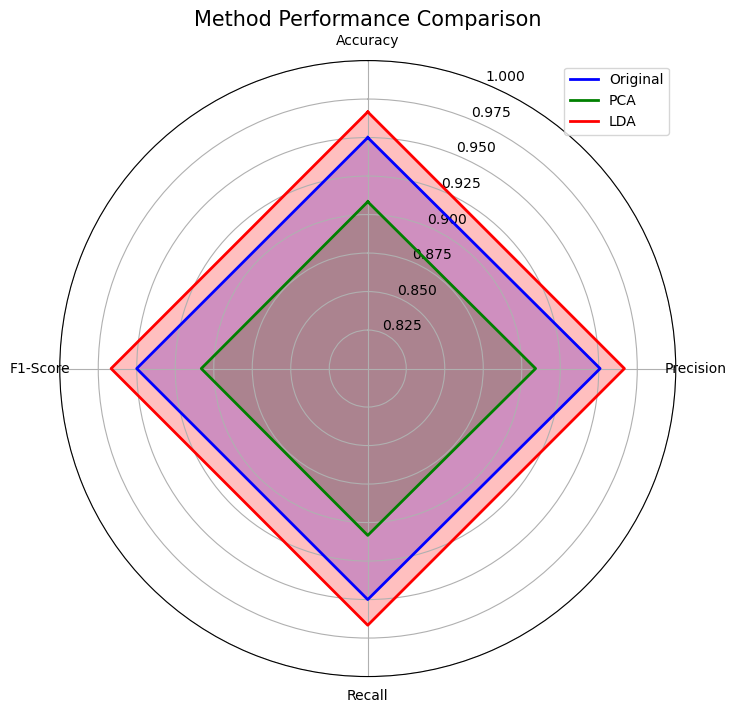

In [128]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

methods = ['Original', 'PCA', 'LDA']
colors = ['blue', 'green', 'red']

for method, color in zip(methods, colors):
    values = avg_by_method.loc[method].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, label=method)
    ax.fill(angles, values, color=color, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

ax.set_ylim(0.8, 1.0)
plt.legend(loc='upper right')
plt.title('Method Performance Comparison', size=15)

    

# Thanks for reading my code :)